# CCIT4092 Data Visualization
# 05 seaborn (3)

In [1]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
f = plt.figure(figsize=(2, 3))

<Figure size 200x300 with 0 Axes>

## Plotting many distributions

In [11]:
tips = sns.load_dataset("tips", data_home="./data/")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\2015628\AppData\Local\Temp\ipykernel_2676\2102580710.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


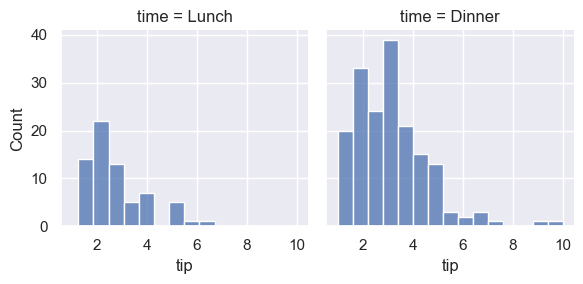

In [13]:
# Create a FacetGrid 
g = sns.FacetGrid(tips, col="time")
# Map a histogram of the attribute 'tip' to each facet
g.map(sns.histplot, "tip")
plt.tight_layout()
plt.show()
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


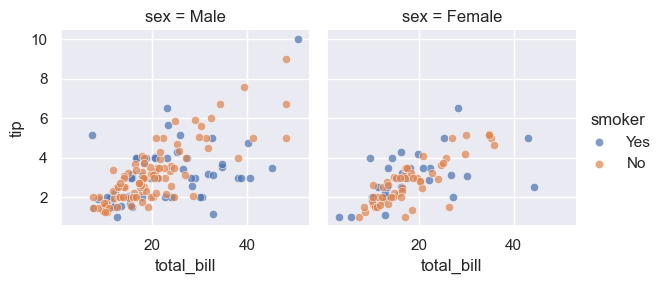

In [15]:
# Create a FacetGrid
g = sns.FacetGrid(tips, col="sex", hue="smoker")
# Map a scatter plot to each facet
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()
plt.show()
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


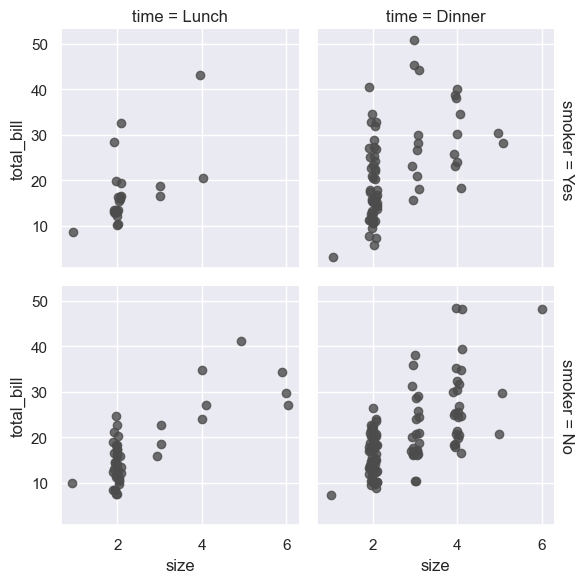

In [22]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1)
plt.show()
plt.close()

['Thur', 'Fri', 'Sat', 'Sun']


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


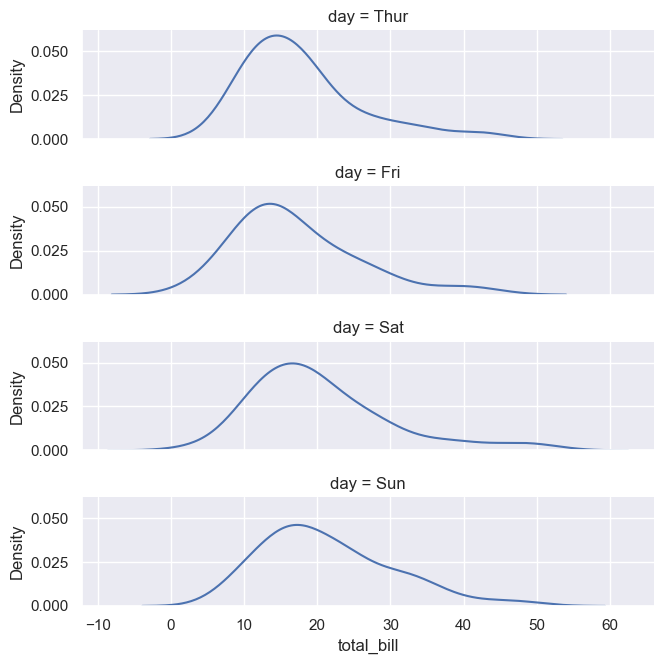

In [25]:
ordered_days = tips.day.value_counts().index
ordered_days = ['Thur', 'Fri', 'Sat', 'Sun']
print(ordered_days)
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "total_bill")
plt.show()
plt.close()

In [26]:
penguins = sns.load_dataset("penguins", data_home='./data/')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [27]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [31]:
penguins['species'] = penguins['species'].astype('category')
penguins['island'] = penguins['island'].astype('category')
penguins['sex'] = penguins['sex'].astype('category')
penguins.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object

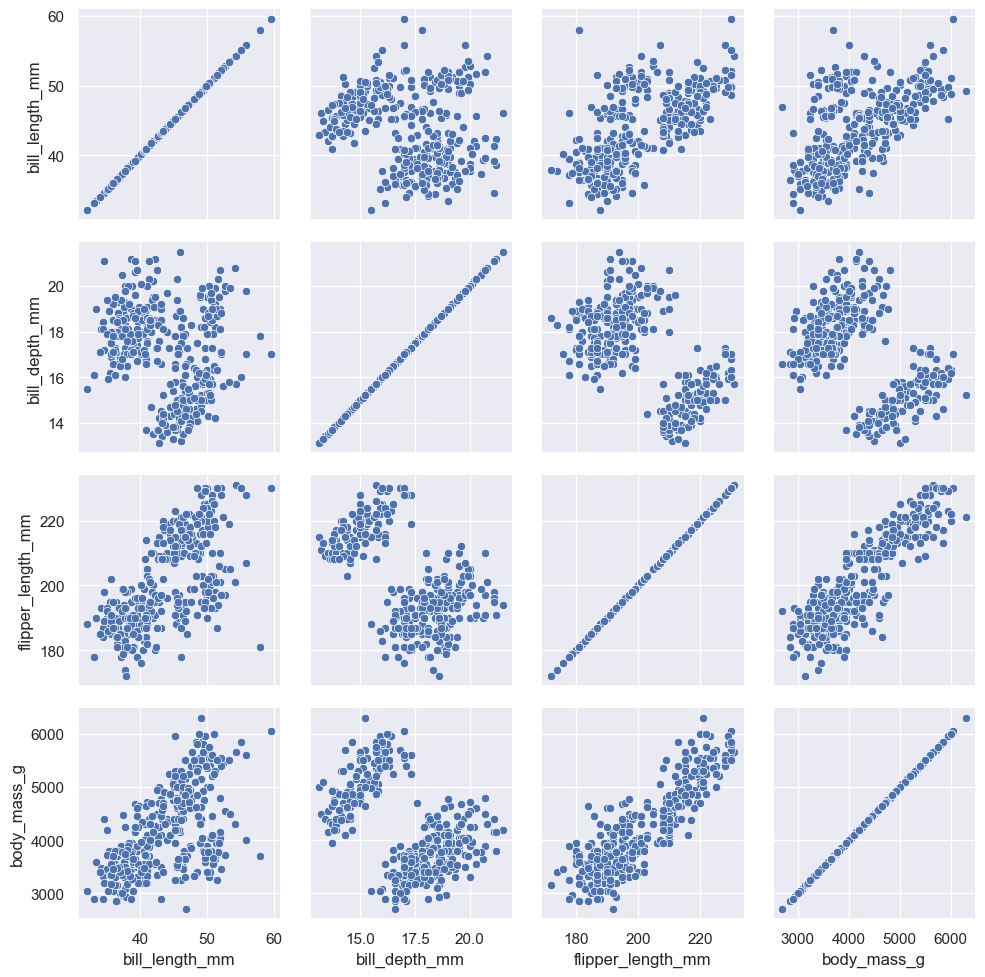

In [33]:
# Create a PairGrid
g = sns.PairGrid(penguins)

# Map a scatter plot to each pair of variables
g.map(sns.scatterplot)
plt.show()
plt.close()

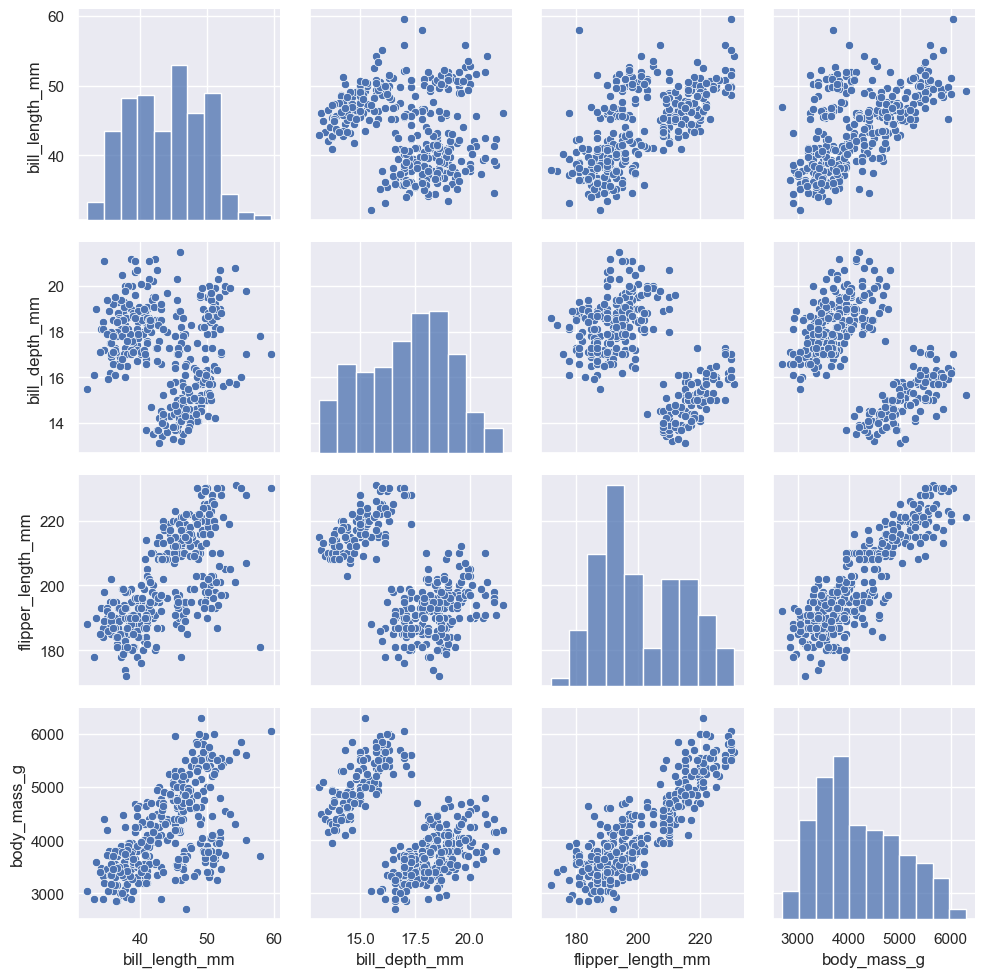

In [38]:
g = sns.PairGrid(penguins)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()
plt.close()

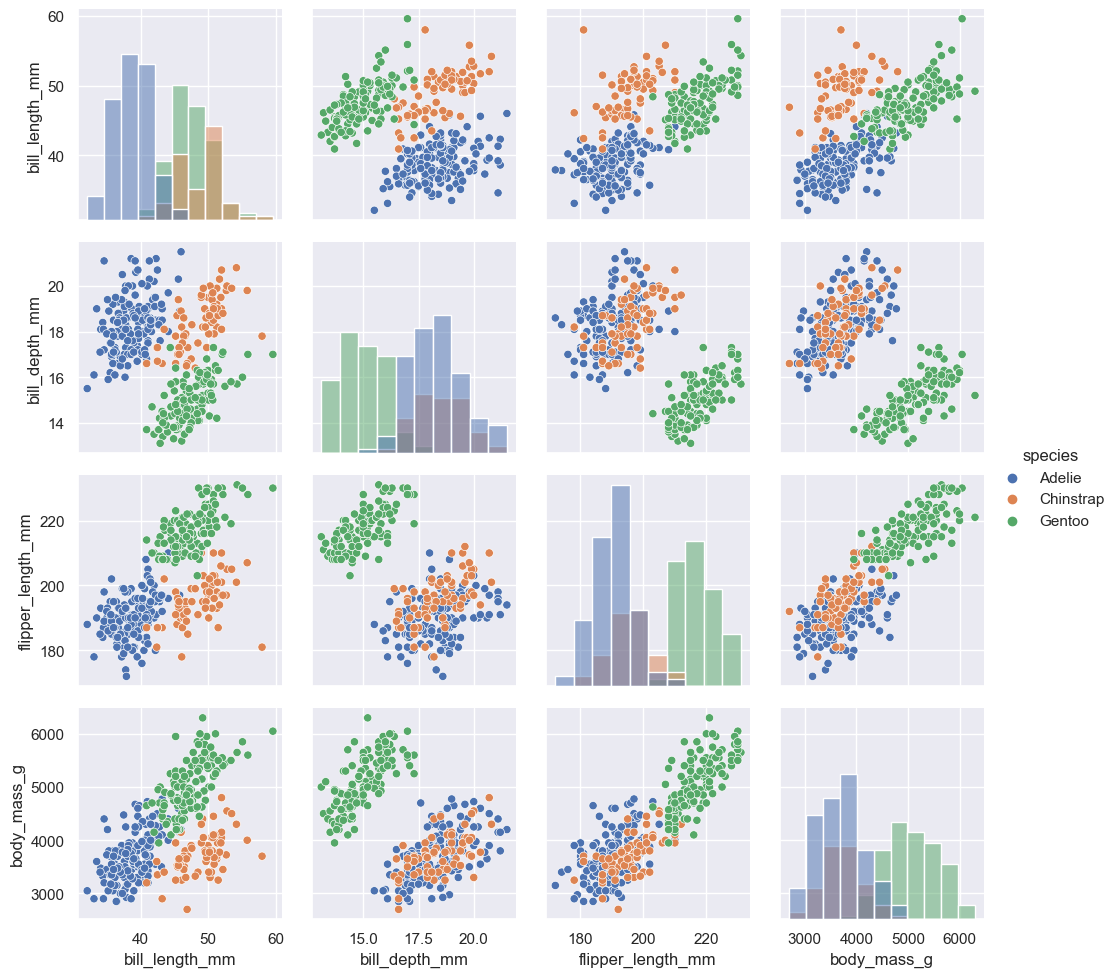

In [39]:
g = sns.PairGrid(penguins, hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()
plt.close()

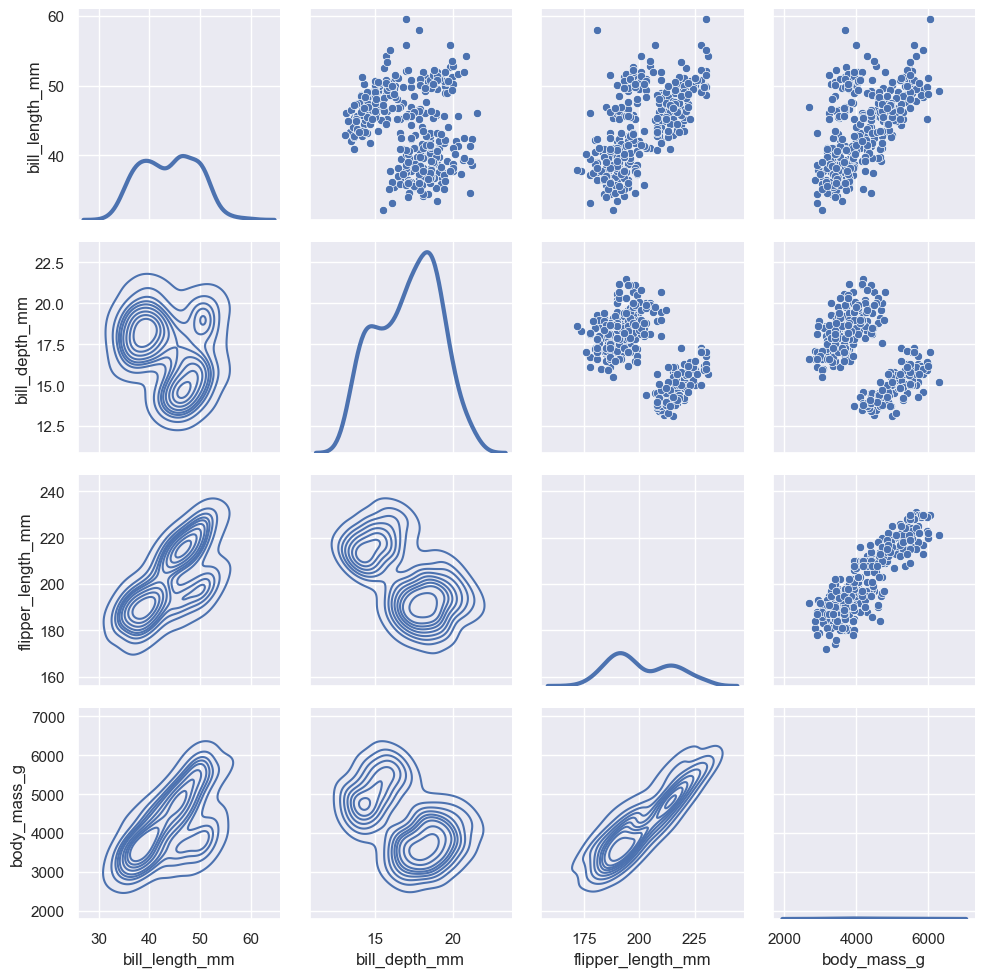

In [42]:
g = sns.PairGrid(penguins)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()
plt.close()

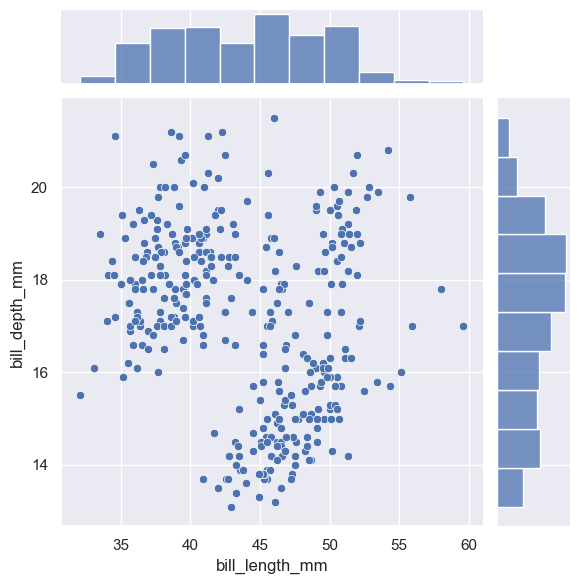

In [46]:
# mainly used for marginal plots
g = sns.JointGrid(penguins, x='bill_length_mm', y='bill_depth_mm')
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot)

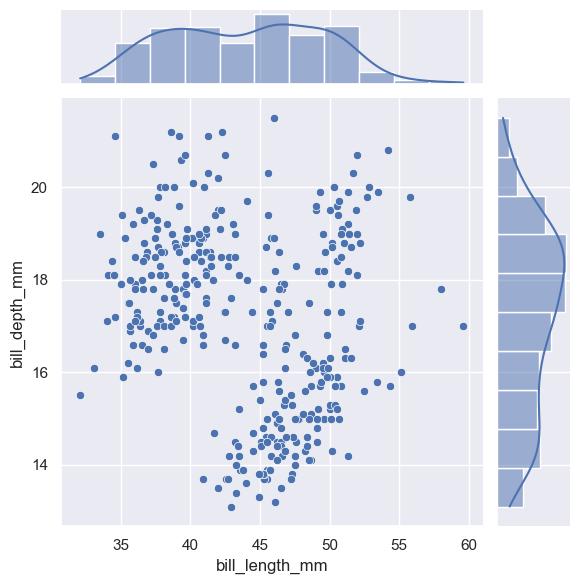

In [47]:
# mainly used for marginal plots
g = sns.JointGrid(penguins, x='bill_length_mm', y='bill_depth_mm')
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot, kde=True)

## Plotting catagorical data

In [68]:
tips = sns.load_dataset("tips", data_home='./data/')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [69]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [70]:
tips['day']

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [72]:
tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [73]:
tips['day'].nunique()  # number of unique category

4

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


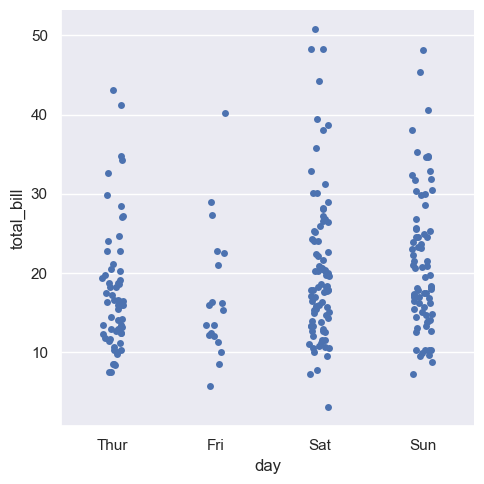

In [74]:
sns.catplot(x="day", y="total_bill", data=tips)
plt.show()
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


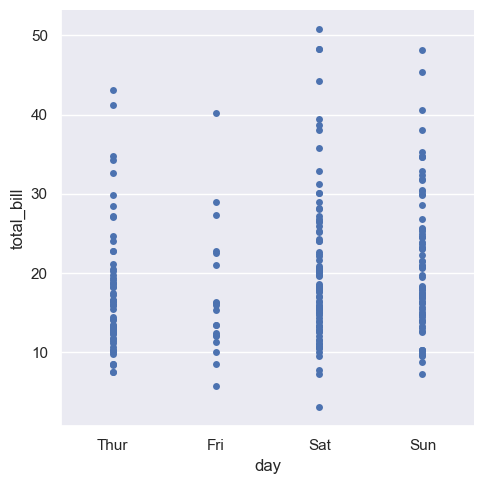

In [75]:
# jitter
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)
plt.show()
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


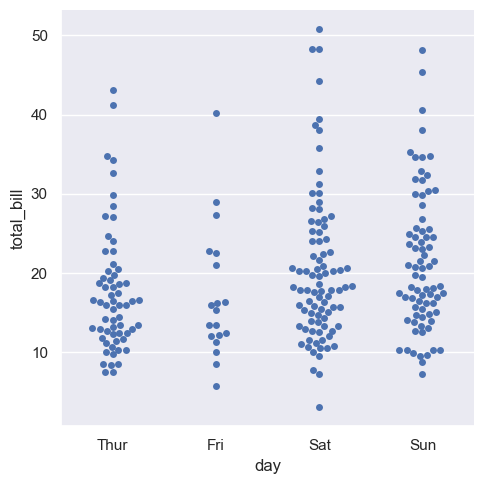

In [76]:
# swarm
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)
plt.show()
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


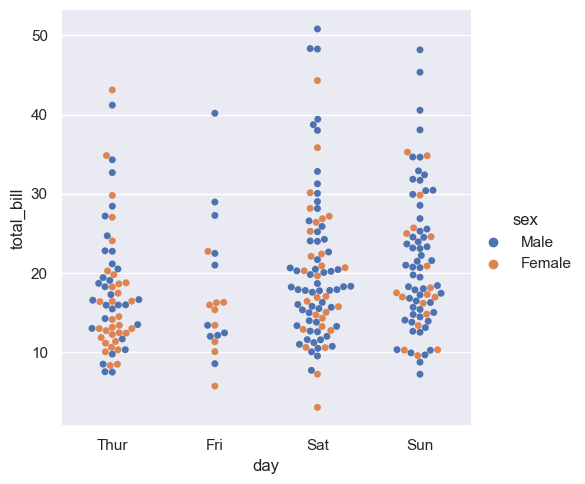

In [77]:
# adding one more dimension
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)
plt.show()
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


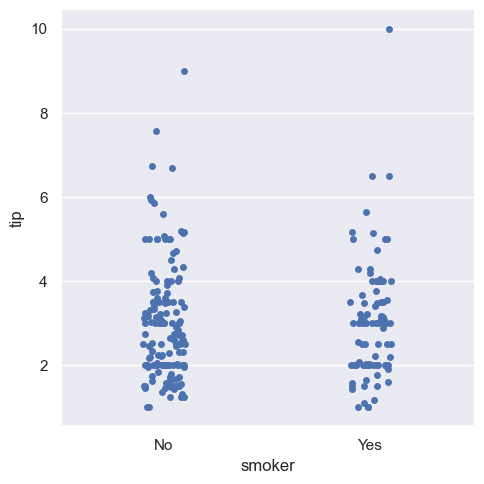

In [78]:
# setting default ordering (of the x-axis labels)
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips)
plt.show()
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


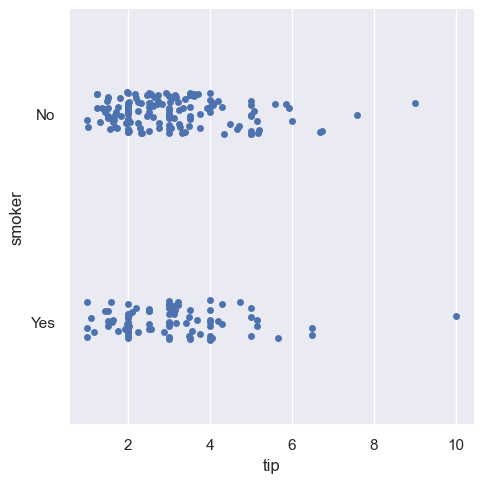

In [79]:
# reverse the axis
sns.catplot(x="tip", y="smoker", order=["No", "Yes"], data=tips)
plt.show()
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


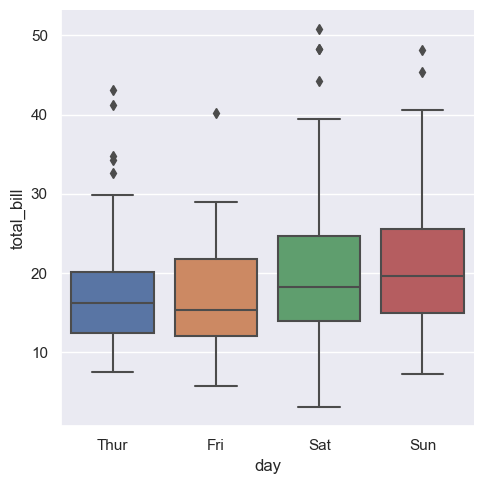

In [80]:
sns.catplot(x="day", y="total_bill", data=tips, kind='box')
plt.show()
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


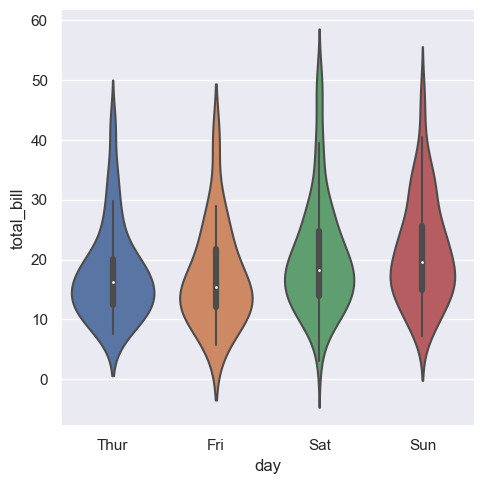

In [81]:
sns.catplot(x="day", y="total_bill", data=tips, kind='violin')
plt.show()
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


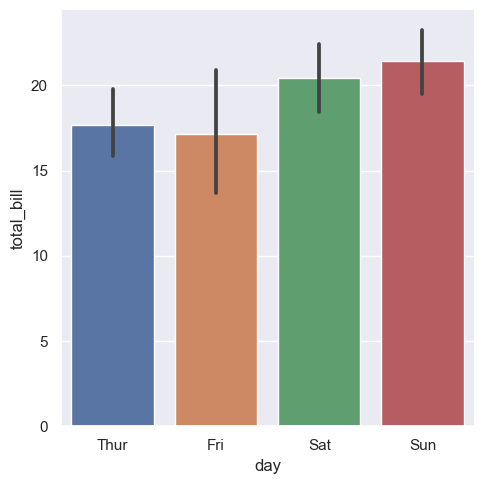

In [85]:
sns.catplot(x="day", y="total_bill", data=tips, kind='bar')
plt.show()
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


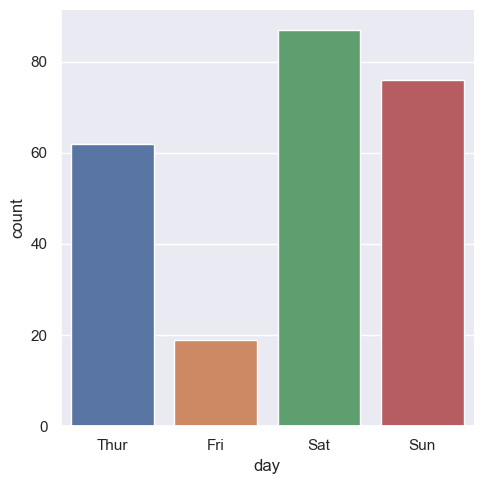

In [86]:
sns.catplot(x="day", data=tips, kind='count')
plt.show()
plt.close()

### Distributions of observations within categories

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


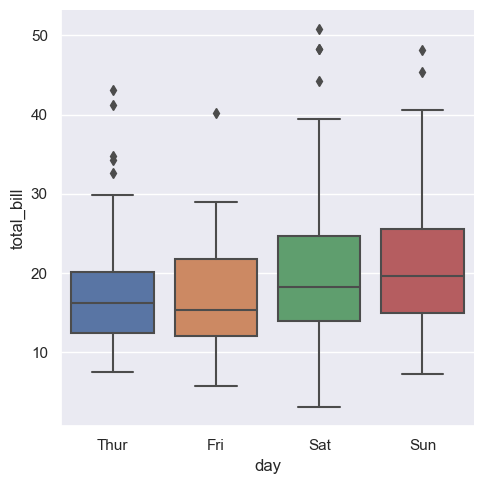

In [87]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)
plt.show()
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


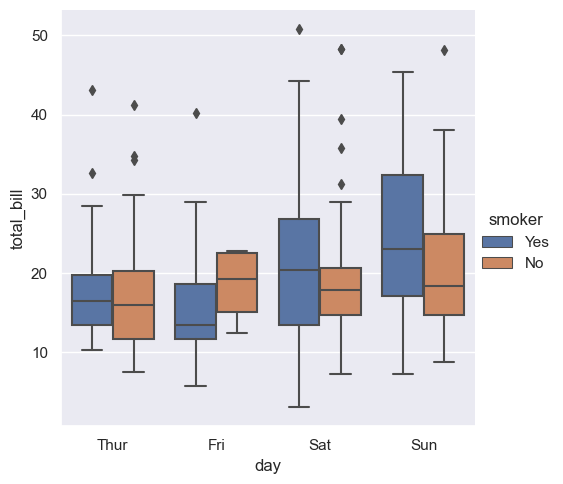

In [88]:
# Adding one more variable using 'hue'
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)
plt.show()
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


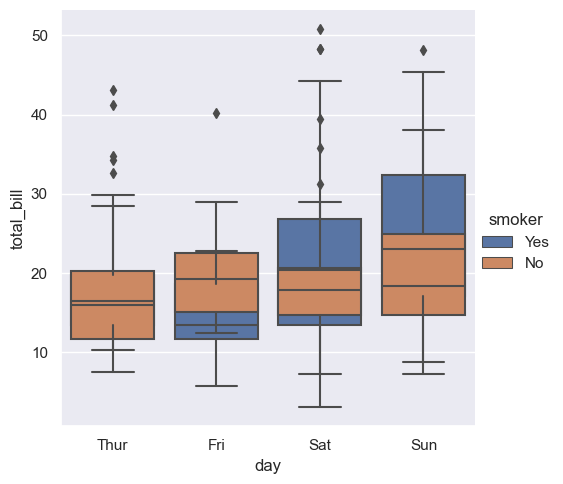

In [89]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips, dodge=False)
plt.show()
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


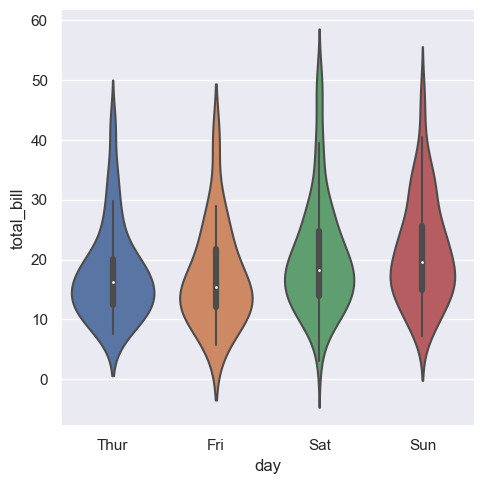

In [90]:
# kind='violin'
sns.catplot(x="day", y="total_bill", kind="violin", data=tips)
plt.show()
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


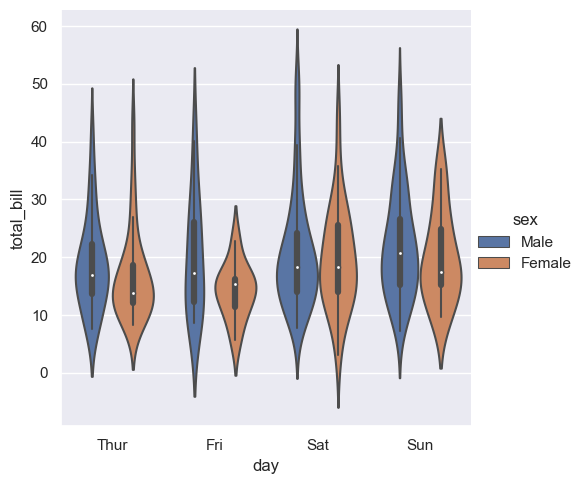

In [91]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", data=tips)
plt.show()
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


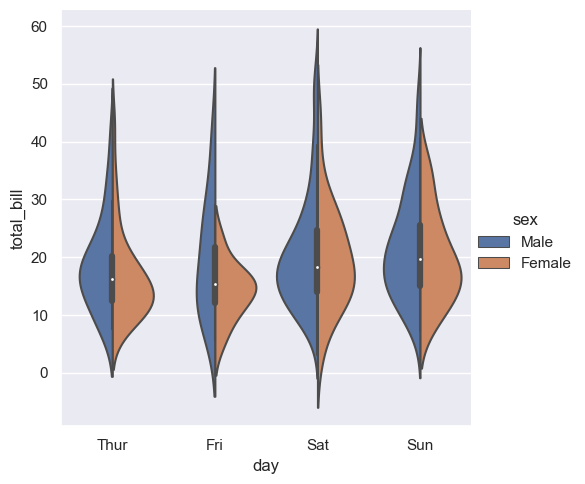

In [92]:
# splitting the violin
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=tips)
plt.show()
plt.close()

## HeatMap

In [98]:
data = {"Column 1": ['One', "One", "One", "Two", "Two", "Two"],
        "Column 2": ['A', 'B', 'C', 'A', 'B', 'C'],
        "Column 3": list(range(6))}
df = pd.DataFrame(data)
display(df)

      #   A    B    C
#  One    0    1    2
#  Two    3    4    5

,Column 1,Column 2,Column 3
0,One,A,0
1,One,B,1
2,One,C,2
3,Two,A,3
4,Two,B,4
5,Two,C,5


In [99]:
df = df.pivot(index='Column 1', columns='Column 2', values = 'Column 3')
df

Column 2,A,B,C
Column 1,,,
One,0,1,2
Two,3,4,5


In [95]:
flights = sns.load_dataset('flights', data_home='./data/')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [96]:
flights = flights.pivot(index="month", columns="year", values="passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


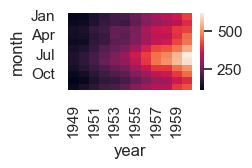

In [100]:
hm = sns.heatmap(flights)
plt.show()
plt.close()

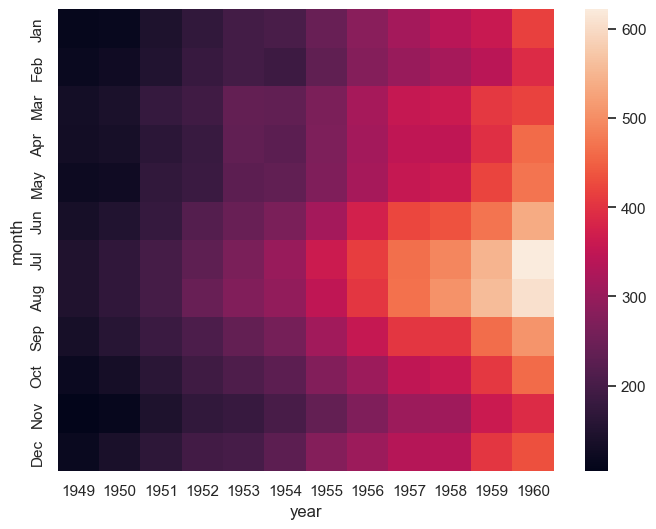

In [101]:
# Controlling the figure size
figure = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(ax=ax, data=flights)
plt.show()
plt.close()

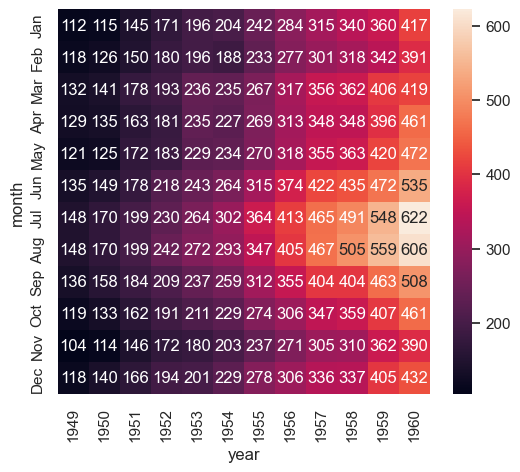

In [104]:
# With annotation
figure = plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(data=flights, ax=ax, annot=True, fmt="d")
plt.show()
plt.close()

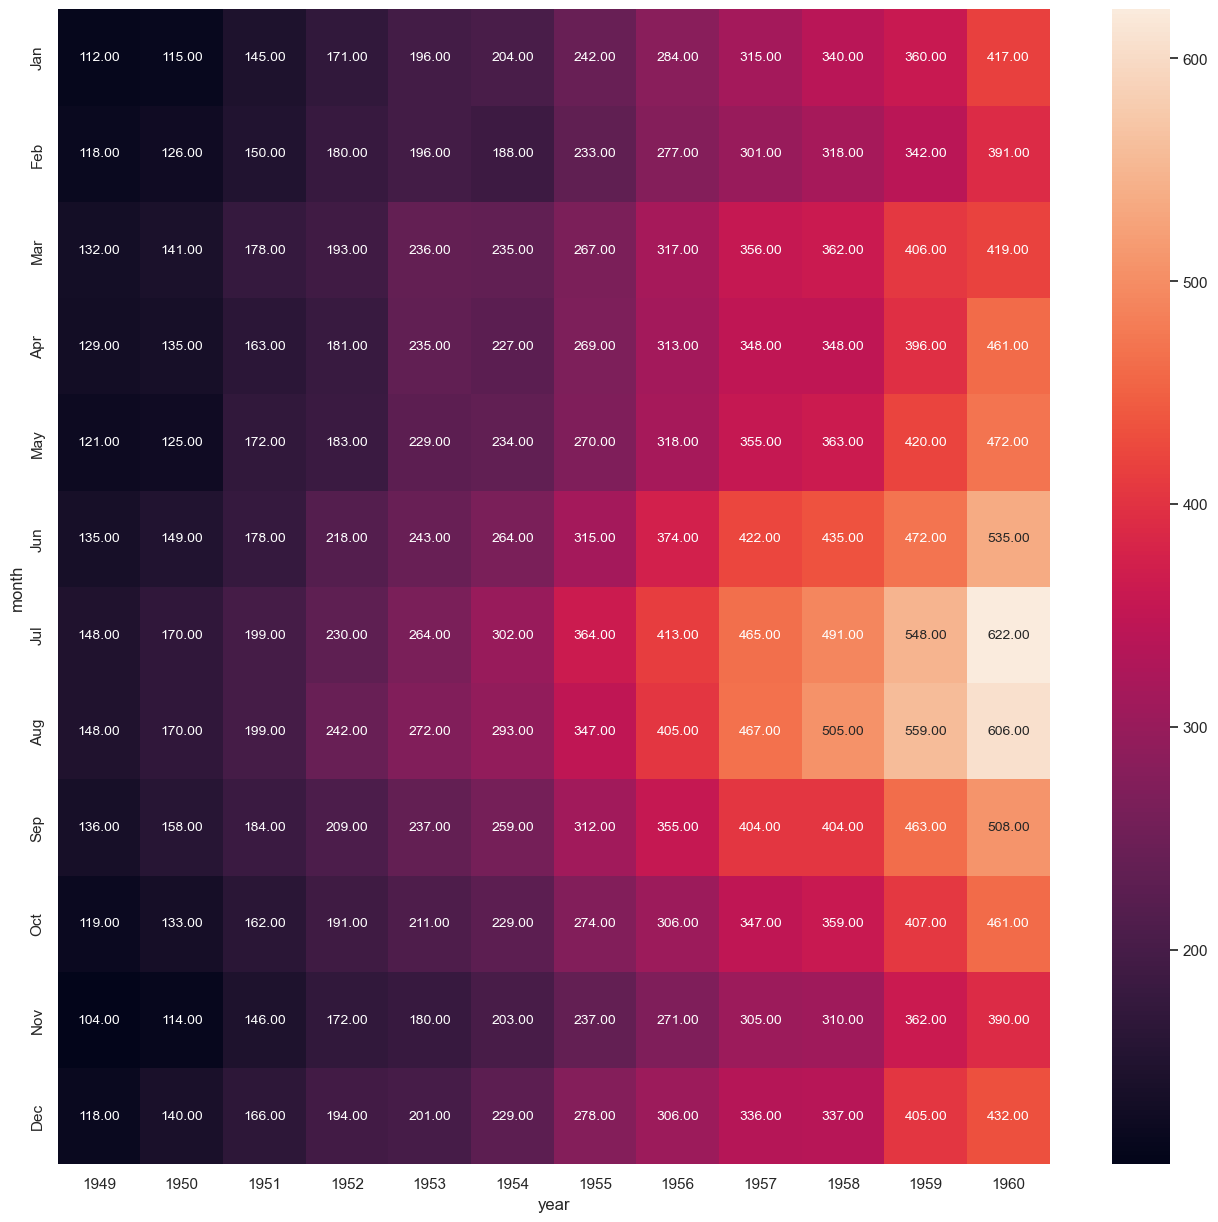

In [110]:
# With annotation
figure = plt.figure(figsize=(16,15))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(data=flights, ax=ax, annot=True, fmt=".2f", annot_kws={'fontsize': 10})
plt.show()
plt.close()

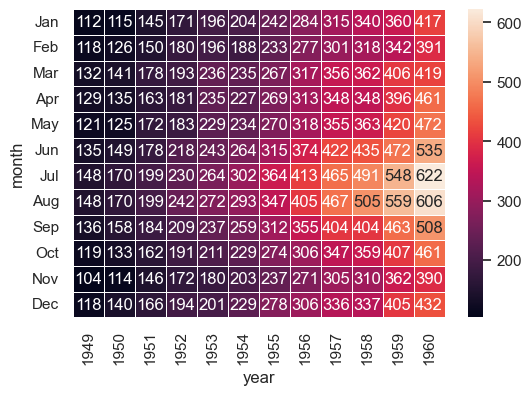

In [113]:
# Add lines between each cell
figure = plt.figure(figsize=(6,4))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(data=flights, annot=True, fmt="d", linewidth=0.5)
plt.show()
plt.close()

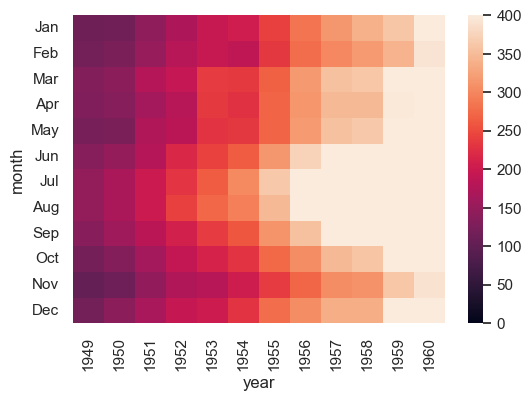

In [114]:
# Adjusting the color range
figure = plt.figure(figsize=(6,4))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(data=flights, vmin=0, vmax=400)
plt.show()
plt.close()

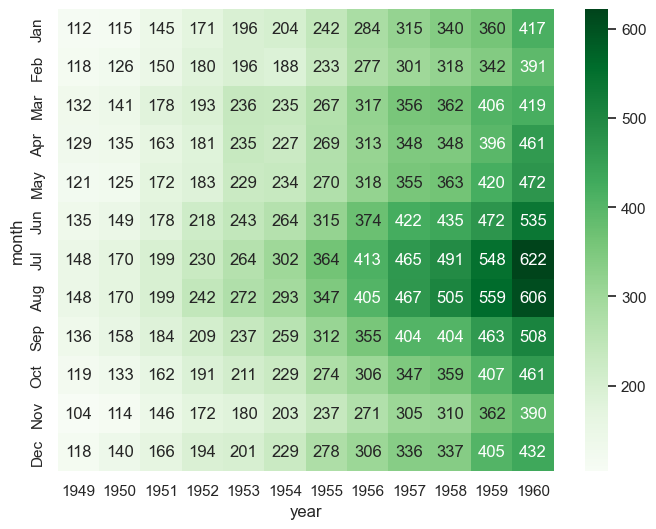

In [115]:
# Changing the color map
# https://matplotlib.org/stable/gallery/color/colormap_reference.html
figure = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(data=flights, annot=True, fmt="d", cmap='Greens')
plt.show()
plt.close()

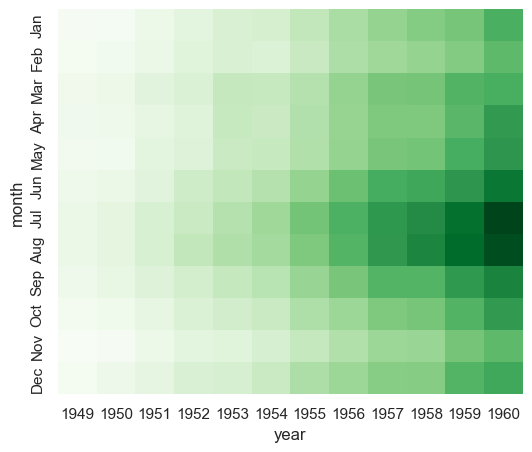

In [116]:
# Don’t draw a colorbar
figure = plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(data=flights, cmap='Greens', cbar=False)
plt.show()
plt.close()

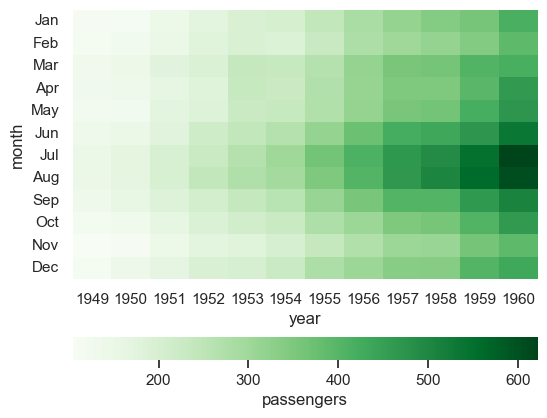

In [117]:
# Color bar arguments
figure = plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(data=flights, cmap='Greens', cbar_kws={'label':'passengers', 'orientation': 'horizontal'})
plt.show()
plt.close()

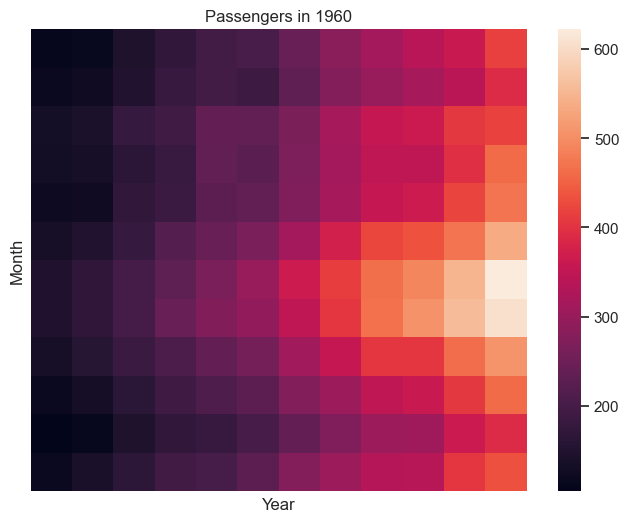

In [118]:
# Customize the labels
figure = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(data=flights, xticklabels=False, yticklabels=False)
plt.title('Passengers in 1960')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()
plt.close()

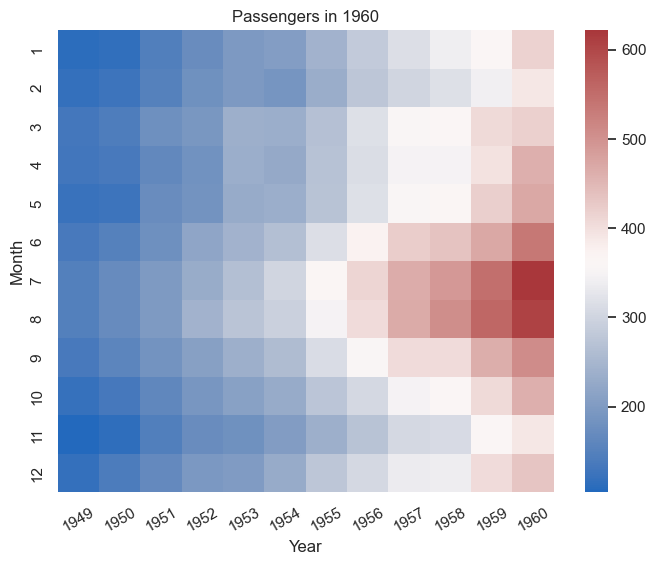

In [120]:
# Customize the labels
figure = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(data=flights, cmap='vlag')
hm.set_xticklabels(hm.get_xticklabels(), rotation=30)
hm.set_yticklabels(labels=range(1,13), rotation=90)
hm.set_xlabel('Year')
hm.set_ylabel('Month')
plt.title('Passengers in 1960')
plt.show()
plt.close()

### Plotting with date data

In [49]:
pd.date_range("2020-1-1", periods=365)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [50]:
pd.date_range("2020-1-1", periods=14)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range("2020-1-1", periods=14, freq='W') # frequency = 'W'

DatetimeIndex(['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26',
               '2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23',
               '2020-03-01', '2020-03-08', '2020-03-15', '2020-03-22',
               '2020-03-29', '2020-04-05'],
              dtype='datetime64[ns]', freq='W-SUN')

In [52]:
pd.date_range("2020-1-1", periods=14, freq='M') 

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28'],
              dtype='datetime64[ns]', freq='M')

In [53]:
pd.date_range("2020-1-1", periods=14, freq='Q') 

DatetimeIndex(['2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31',
               '2023-03-31', '2023-06-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [55]:
import pandas as pd
import numpy as np
df = pd.DataFrame(dict(time=pd.date_range("2020-1-1", periods=365),
                       value=np.random.randn(365).cumsum()))
df

,time,value
0,2020-01-01,-1.802285
1,2020-01-02,-3.741394
2,2020-01-03,-3.994059
3,2020-01-04,-4.522651
4,2020-01-05,-4.973949
...,...,...
360,2020-12-26,9.734296
361,2020-12-27,11.069927
362,2020-12-28,10.636053
363,2020-12-29,11.285549


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


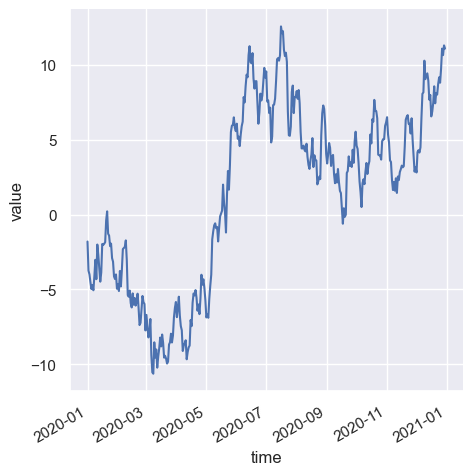

In [58]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

In [59]:
dates = pd.date_range(start="2025-1-1", end='2025-1-31', freq='D')
dates

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10', '2025-01-11', '2025-01-12',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-18', '2025-01-19', '2025-01-20',
               '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24',
               '2025-01-25', '2025-01-26', '2025-01-27', '2025-01-28',
               '2025-01-29', '2025-01-30', '2025-01-31'],
              dtype='datetime64[ns]', freq='D')

In [61]:
dates = pd.date_range(start="2025-1-1", end='2025-3-31', freq='M')
dates

DatetimeIndex(['2025-01-31', '2025-02-28', '2025-03-31'], dtype='datetime64[ns]', freq='M')

In [67]:
dates = pd.date_range(start="2020-1-1", end='2025-3-31', freq='A-FEB')
dates

DatetimeIndex(['2020-02-29', '2021-02-28', '2022-02-28', '2023-02-28',
               '2024-02-29', '2025-02-28'],
              dtype='datetime64[ns]', freq='A-FEB')